# Домашнее задание

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Normal

Исследуйте другой похожий датасет: отток клиентов мобильного оператора. Ваша цель - численные столбцы (ClientPeriod, MonthlySpending, TotalSpent).

- ознакомьтесь с данными и проведите необходимую предобработку;
- проведите исследовательский анализ трех указанных выше признаков (распределение в целом и по лояльным/ушедшим клиентам);
- оцените взаимозависимость признаков с помощью матрицы рассеяния.

Не забывайте снабжать графики краткими выводами.

In [2]:
df = pd.read_csv(r'C:\Users\UserOfPC\Documents\Бруноям окт_2023\telecom_churn.csv')

### 1. Обзор данных

In [3]:
df.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

В Датасете 3 числовых признака, остальные - категориальные. Последний - целевой признак - категориальный ('отток клиентов': 1 - клиент ушел, 0 - остался). Пустых ячеек не содержится.

In [5]:
type(df['TotalSpent'][2])

str

In [6]:
df.query('TotalSpent == " "')

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [7]:
# Преобразуем данные в Серии TotalSpent из строковых в тип float64 (т.к. это числа с плавающей точкой).
# Перед преобразованием заменим на 0 строки, в которых пробел вместо данных

mask = df['TotalSpent'].str.startswith(' ')
df.loc[mask, 'TotalSpent'] = 0

In [8]:
# Проверим себя
df.query('TotalSpent == ""')

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn


In [9]:
df['TotalSpent'] = df['TotalSpent'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ClientPeriod,5282.0,32.397009,24.550326,0.00,9.0000,29.00,55.0000,72.00
MonthlySpending,5282.0,64.924754,30.176464,18.25,35.4625,70.40,90.0500,118.75
TotalSpent,5282.0,2287.486161,2269.049195,0.00,395.7250,1405.65,3795.2125,8684.80
IsSeniorCitizen,5282.0,0.159409,0.366092,0.00,0.0000,0.00,0.0000,1.00
Churn,5282.0,0.262022,0.439776,0.00,0.0000,0.00,1.0000,1.00


1. Максимальный период сотрудничества с клиентом составляет - 72 месяца, медианный - 29 месяцев.
2. Максимальные расходы клиента за месяц составили 118.75 y.e., минимальные - 18,25 y.e.


In [12]:
df.query('Churn == 0').count()['Churn'] / len(df)  # Лояльные

0.7379780386217342

In [13]:
df.query('Churn == 1').count()['Churn'] / len(df)  # Ушедшие

0.26202196137826583

Соотношение покинувших/оставшихся клиентов = 26/74.

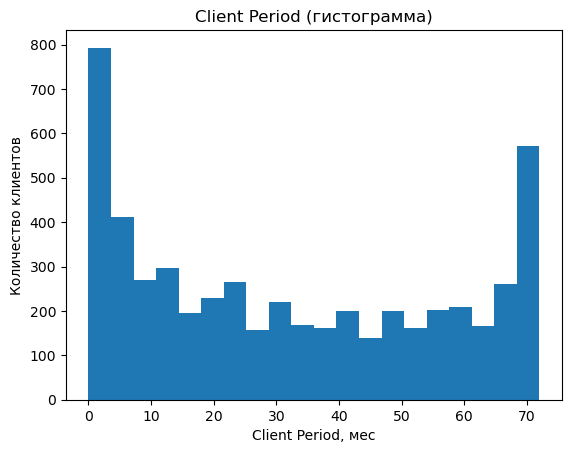

In [14]:
plt.hist(df['ClientPeriod'], bins=20)
plt.title("Client Period (гистограмма)")
plt.xlabel("Client Period, мес")
plt.ylabel("Количество клиентов");

Наиболее многочисленные группы - с минимальным и максимальным периодом сотрудничества с компанией.

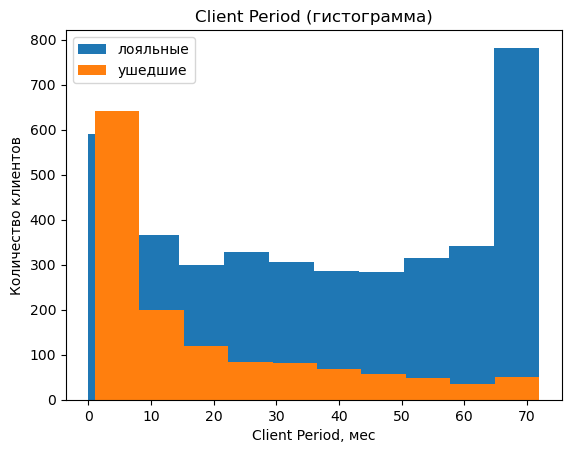

In [15]:
df.groupby('Churn')['ClientPeriod'].plot(kind='hist')
plt.title("Client Period (гистограмма)")
plt.xlabel("Client Period, мес")
plt.ylabel("Количество клиентов")
plt.legend(['лояльные', 'ушедшие']);

Наибольшее количество ушедших клиентов имеют небольшой период сотрудничества. У лояльных клиентов, наоборот, максимальное количество - в группе с максимальным периодом обслуживания. Однако лояльных клиентов с минимальным периодом - также значительно много.

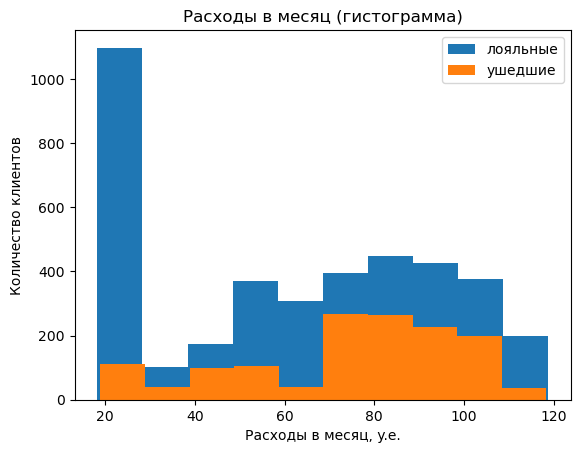

In [16]:
df.groupby('Churn')['MonthlySpending'].plot(kind='hist')
plt.title("Расходы в месяц (гистограмма)")
plt.xlabel("Расходы в месяц, y.e.")
plt.ylabel("Количество клиентов")
plt.legend(['лояльные', 'ушедшие']);

Большинство лояльных клиентов имеют небольше расходы в месяц, около 20-30 y.e. По остальным группам распределение расходов в месяц достаточно равномерное.

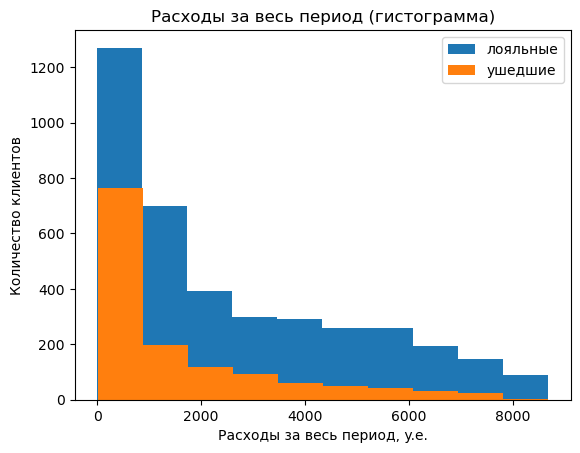

In [17]:
df.groupby('Churn')['TotalSpent'].plot(kind='hist')
plt.title("Расходы за весь период (гистограмма)")
plt.xlabel("Расходы за весь период, y.e.")
plt.ylabel("Количество клиентов")
plt.legend(['лояльные', 'ушедшие']);

И в группе лояльных и в группе ушедших клиентов наблюдается общая тенденция распределения общих расходов - большинство клиентов не тратят более 1000 y.e. за весь период сотрудничества. 

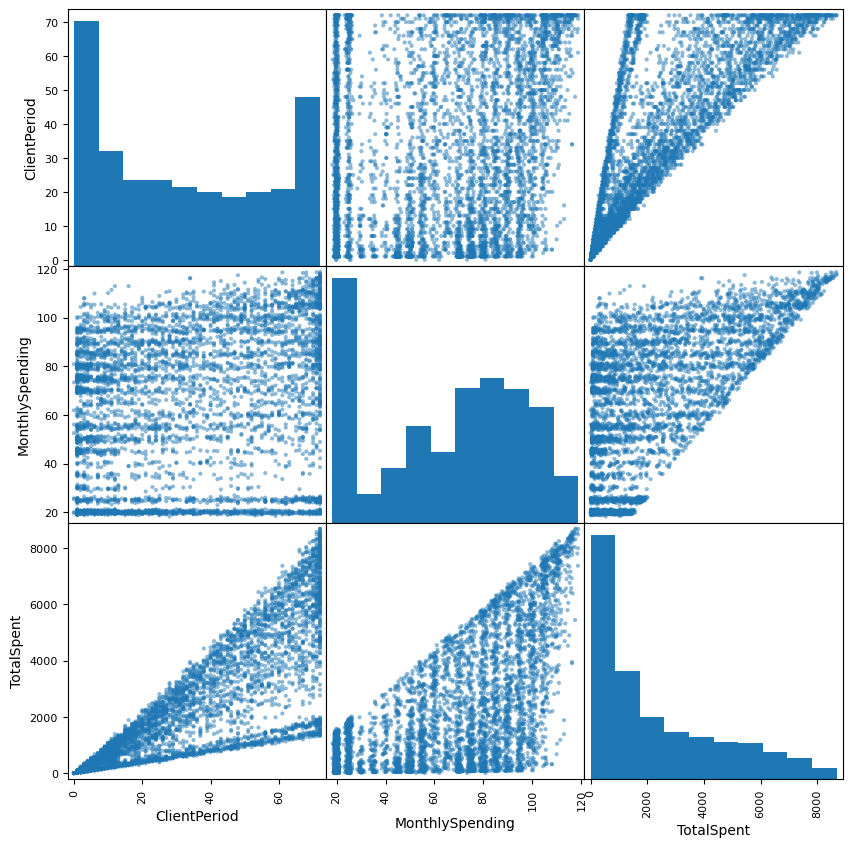

In [18]:
pd.plotting.scatter_matrix(df[['ClientPeriod', 'MonthlySpending', 'TotalSpent']], figsize=(10, 10));

Очевидная взаимосвязь прослеживается на графике TotalSpent/ClientPeriod - рост общих расходов с увеличением периода обслуживания, а также увеличивается размах вариации - разница между максимальным и минимальным значением Общих Расходов.

### Hard

Исследуйте датасет "Титаник". Подумайте, от каких признаков могли зависеть шансы пассажира спастись (столбец Survived)? Проведите исследовательский анализ и выделите хотя бы один, а лучше больше таких признаков.

На базе этих признаков постройте логическое выражение, предсказывающее, выжил ли пассажир, и запишите результат в столбец Predicted. Например:

In [19]:
# df['Predicted'] = (df['Столбец_1'] == 'значение') & (df['Столбец_2'] < 42)

При работе с логическими масками используются побитовые логические операции. Также можно использовать построчный apply().

Ваша задача - построить выражение, дающее точность (accuracy) заметно выше бейзлайна.

### Baseline

Как известно, большинство пассажиров не выжило. Поэтому объявим бейзлайном "все умерли":

In [20]:
# df['Predicted'] = 0

Метрика accuracy соответсвует общей доле правильных ответов:

In [21]:
# sum(df['Predicted'] == df['Survived']) / len(df)

Таким образом, базовая точность составляет около 62%.

In [22]:
df = pd.read_csv(r'C:\Users\UserOfPC\Documents\Бруноям окт_2023\titanic.csv')

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


В Датасете есть пропущенные значения в столбцах Age, Cabin и Embarked.

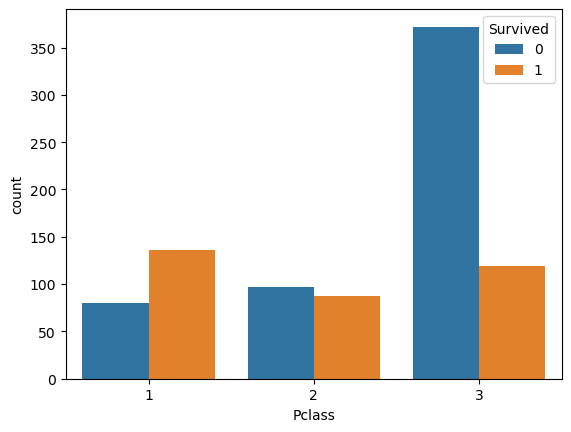

In [25]:
# создадим countplot по двум категориальным переменным, где по оси x будет класс, а по оси y - количество пассажиров
# в каждом классе данные разделены на погибших (0) и выживших (1)
sns.countplot(x = 'Pclass', hue = 'Survived', data = df);

Видна взаимосвязь: в 3м классе не выживших гораздо больше, и наоборот, в 1м классе - больше выживших.

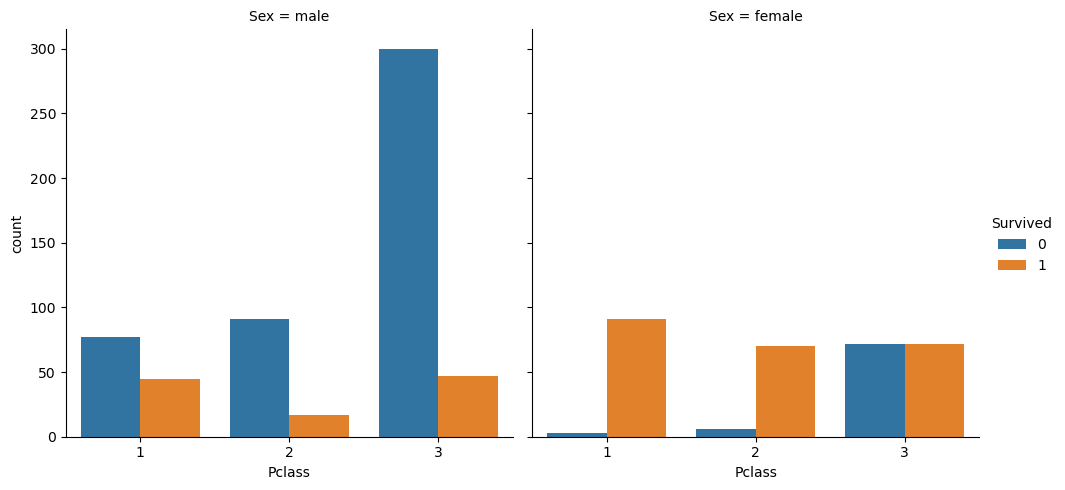

In [26]:
# добавим еще один признак (пол) через параметр col
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = df);

В целом прослеживается взаимосвязь также от пола: погибших женщин меньше, чем мужчин (по всем классам).
1. По мужчинам: погибших в 3м классе гораздо больше, чем в 1м и во 2м.
2. По женщинам: в 1м и во 2м классах очень мало погибших женщин, в 3м классе число погибших женщин примерно равно выжившим женщинам.

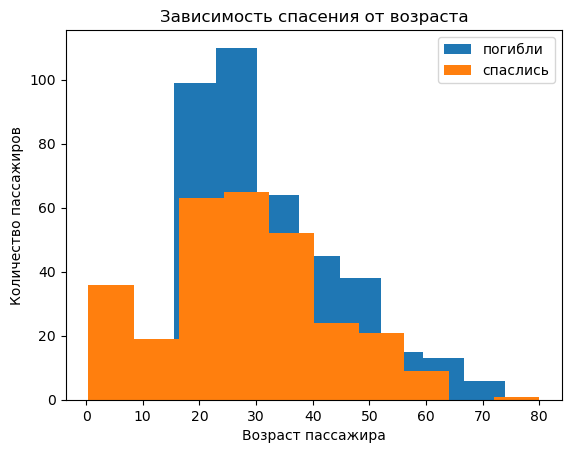

In [27]:
df.groupby('Survived')['Age'].plot(kind='hist')
plt.title("Зависимость спасения от возраста")
plt.xlabel("Возраст пассажира")
plt.ylabel("Количество пассажиров")
plt.legend(['погибли', 'спаслись']);

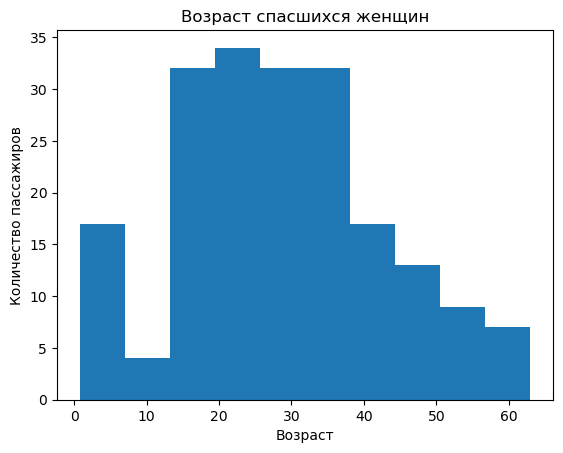

In [28]:
female_survivors = df.loc[((df['Sex'] == 'female') & (df['Survived'] == 1))]
female_survivors.groupby('Survived')['Age'].plot(kind='hist');
plt.title("Возраст спасшихся женщин")
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров");

Наибольшее количество спасшихся женщин в возрасте от 0 до 6 и от 14 до 37 (приблизительно).

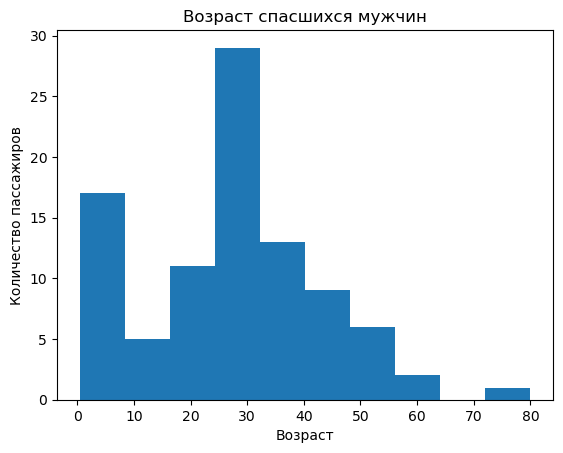

In [29]:
male_survivors = df.loc[((df['Sex'] == 'male') & (df['Survived'] == 1))]
male_survivors.groupby('Survived')['Age'].plot(kind='hist');
plt.title("Возраст спасшихся мужчин")
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров");

Наибольшее количество спасшихся мужчин в возрасте от 0 до 6 и от 25 до 32 (приблизительно).

In [30]:
df.query(('Age < 7 & Survived == 1'))['PassengerId'].count() / df.query(('Age < 7'))['PassengerId'].count()

0.7021276595744681

Можно предположить, что шанс выжить зависит и от возраста пассажира. Количество погибших в возрасте примерно от 15 - 30 гораздо выше. Однако, и среди спасшихся самая многочисленная категория примерно от 17 - 40, поэтому сложно выявить зависимость. Однозначная закономерность: 70% детей до 7ми лет - спаслись.

In [31]:
df['Predicted'] = (df['Pclass'] == 1) & (df['Sex'] == 'female')  \
                | (df['Pclass'] == 2) & (df['Sex'] == 'female')  \
                | (df['Age'] < 7)

In [32]:
sum(df['Predicted'] == df['Survived']) / len(df)

0.8024691358024691

Выявленные закономерности, которые повлияли на выживаемость:
1. Женщины из 1 и 2 класса в большинстве выжили
2. Дети до 7ми лет в большинстве выжили

Данные закономерности легли в основу логического выражения, давшее точность (accuracy) 80% - заметно выше бейзлайна (60%).